## Part (a) &mdash; Attenuation curves

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sedpy import attenuation
import fsps

In [2]:
# vector of wavelengths, in angstroms
lambdas = np.linspace(1000,10000,5000)

In [3]:
# attenuation curves
powerlaw = attenuation.powerlaw(lambdas)
calzetti = attenuation.calzetti(lambdas)
cardelli = attenuation.cardelli(lambdas)
lmc = attenuation.lmc(lambdas)
smc = attenuation.smc(lambdas)

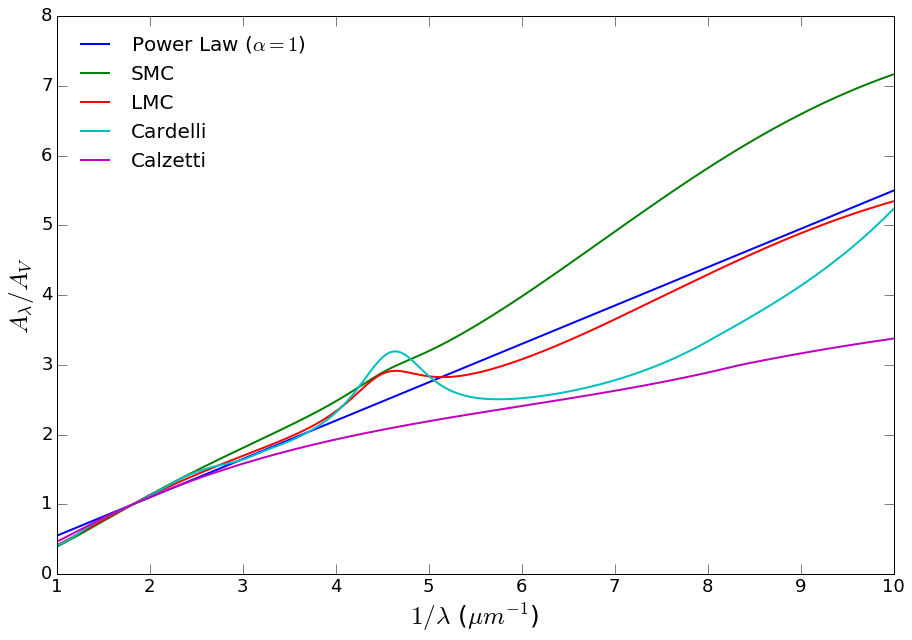

In [4]:
### plotting
fig = plt.figure(figsize=(15,10),dpi=300)
plt.plot(10**4/lambdas, powerlaw, lw=2, label=r'Power Law ($\alpha=1$)')
plt.plot(10**4/lambdas, smc, lw=2, label='SMC')
plt.plot(10**4/lambdas, lmc, lw=2, label='LMC')
plt.plot(10**4/lambdas, cardelli, lw=2, label='Cardelli')
plt.plot(10**4/lambdas, calzetti, lw=2, label='Calzetti')
plt.legend(loc=2,fontsize=20,frameon=False)
plt.xlabel(r'$1/\lambda$ ($\mu m^{-1}$)', fontsize=25)
plt.ylabel(r'$A_{\lambda}/A_V$', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=18, size=10)
plt.show()

Note: all attenuation curves are normalized to the attenuation at 5500 Angstroms.

## Part (b) &mdash; Filter transmission curves

In [5]:
fsps.find_filter('sdss')

['sdss_u', 'sdss_g', 'sdss_i', 'sdss_r', 'sdss_z']

In [6]:
fsps.find_filter('galex')

['galex_nuv', 'galex_fuv']

In [7]:
### filters here
u = fsps.get_filter('sdss_u').transmission
g = fsps.get_filter('sdss_g').transmission
r = fsps.get_filter('sdss_r').transmission
i = fsps.get_filter('sdss_i').transmission
z = fsps.get_filter('sdss_z').transmission
galex_fuv = fsps.get_filter('galex_fuv').transmission
galex_nuv = fsps.get_filter('galex_nuv').transmission

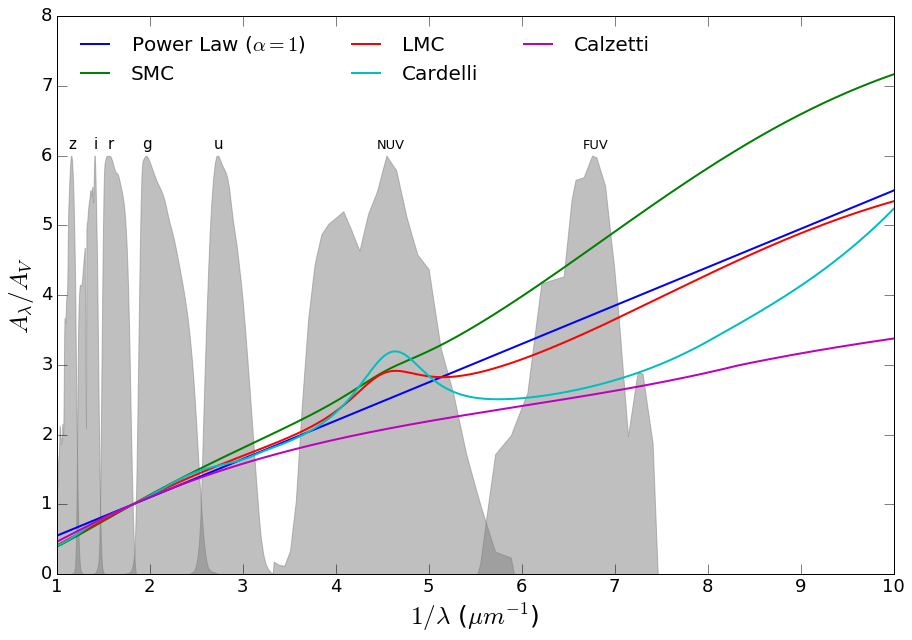

In [8]:
fig, ax = plt.subplots(figsize=(15,10),dpi=300)
### attenuation curves
ax.plot(10**4/lambdas, powerlaw, lw=2, label=r'Power Law ($\alpha=1$)')
ax.plot(10**4/lambdas, smc, lw=2, label='SMC')
ax.plot(10**4/lambdas, lmc, lw=2, label='LMC')
ax.plot(10**4/lambdas, cardelli, lw=2, label='Cardelli')
ax.plot(10**4/lambdas, calzetti, lw=2, label='Calzetti')
### transmission filters -- wavelength is in angstroms
ax.fill_between(10**4/u[0], 6*u[1]/np.max(u[1]), color='gray', alpha=0.5)#, label='u')
ax.fill_between(10**4/g[0], 6*g[1]/np.max(g[1]), color='gray', alpha=0.5)#, label='g')
ax.fill_between(10**4/r[0], 6*r[1]/np.max(r[1]), color='gray', alpha=0.5)#, label='r')
ax.fill_between(10**4/i[0], 6*i[1]/np.max(i[1]), color='gray', alpha=0.5)#, label='i')
ax.fill_between(10**4/z[0], 6*z[1]/np.max(z[1]), color='gray', alpha=0.5)#, label='z')
ax.fill_between(10**4/galex_fuv[0], 6*galex_fuv[1]/np.max(galex_fuv[1]),\
               color='gray', alpha=0.5)#, label='galex_fuv')
ax.fill_between(10**4/galex_nuv[0], 6*galex_nuv[1]/np.max(galex_nuv[1]), \
               color='gray', alpha=0.5)#, label='galex_nuv')
ax.text(10**4/u[0][np.where(u[1]==np.max(u[1]))[0]]-0.05,6.1,'u', fontsize=15)
ax.text(10**4/g[0][np.where(g[1]==np.max(g[1]))[0]]-0.04,6.1,'g', fontsize=15)
ax.text(10**4/r[0][np.where(r[1]==np.max(r[1]))[0]],6.1,'r', fontsize=15)
ax.text(10**4/i[0][np.where(i[1]==np.max(i[1]))[0]]-0.015,6.1,'i', fontsize=15)
ax.text(10**4/z[0][np.where(z[1]==np.max(z[1]))[0]]-0.03,6.1,'z', fontsize=15)
ax.text(10**4/galex_fuv[0][np.where(galex_fuv[1]==np.max(galex_fuv[1]))[0]]-0.1,6.1,'FUV',fontsize=13)
ax.text(10**4/galex_nuv[0][np.where(galex_nuv[1]==np.max(galex_nuv[1]))[0]]-0.1,6.1,'NUV',fontsize=13)
ax.legend(loc=2,fontsize=20,frameon=False,ncol=3)
ax.set_xlabel(r'$1/\lambda$ ($\mu m^{-1}$)', fontsize=25)
ax.set_ylabel(r'$A_{\lambda}/A_V$', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=18, size=10)
ax.set_xlim([1,10])
plt.show()

## Part (c) &mdash; Conroy extinction curve

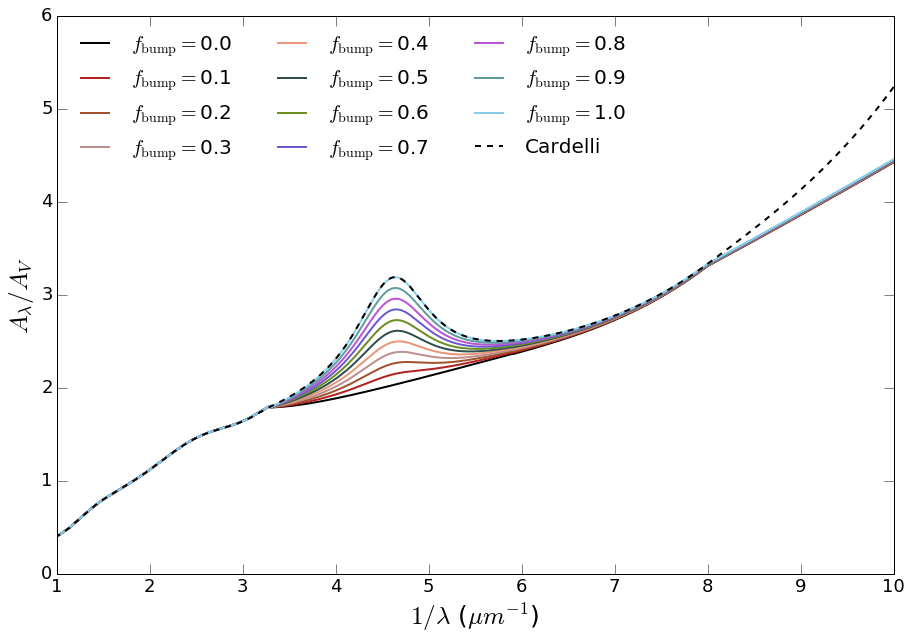

In [9]:
fig = plt.figure(figsize=(15,10),dpi=300)
fbumps = np.linspace(0,1,num=11)
colors = ['black','firebrick','sienna','rosybrown','darksalmon','darkslategray','olivedrab','slateblue',\
          'mediumorchid','cadetblue','skyblue']

for i in range(11):
    conroy = attenuation.conroy(lambdas, f_bump=fbumps[i])
    plt.plot(10**4/lambdas, conroy, label=r'$f_{\rm bump} = $'+str(fbumps[i]), lw=2, color=colors[i])

plt.plot(10**4/lambdas, cardelli, label='Cardelli', color='k', ls='--', lw=2)
plt.legend(loc=2,fontsize=20,frameon=False, ncol=3)
plt.xlabel(r'$1/\lambda$ ($\mu m^{-1}$)', fontsize=25)
plt.ylabel(r'$A_{\lambda}/A_V$', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=18, size=10)
plt.show()

The Cardelli and Conroy curves are equal for a bump fraction of 1.0 and only for $1/\lambda$ $\lesssim$ 8.

## Part (d) &mdash; Constraining bump fraction

If we want to constrain the bump fraction, then we want filters that will cover in the region of interest, roughly 3 to 6.5 microns$^{-1}$.

In [10]:
uv_filters = fsps.find_filter("uv")
uv_filters.sort()
uv_filters

['galex_fuv',
 'galex_nuv',
 'uvot_m2',
 'uvot_w1',
 'uvot_w2',
 'wfc3_uvis_f218w',
 'wfc3_uvis_f225w',
 'wfc3_uvis_f275w',
 'wfc3_uvis_f336w',
 'wfc3_uvis_f390w',
 'wfc3_uvis_f438w',
 'wfc3_uvis_f475w',
 'wfc3_uvis_f555w',
 'wfc3_uvis_f606w',
 'wfc3_uvis_f775w',
 'wfc3_uvis_f814w',
 'wfc3_uvis_f850lp']

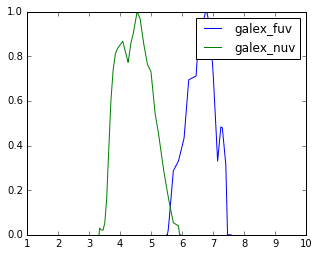

In [17]:
fig = plt.figure(figsize=(5,4))
for item in uv_filters[0:2]:
    filt = fsps.get_filter(item)
    plt.plot(10**4/filt.transmission[0], filt.transmission[1]/max(filt.transmission[1]), label=item)

plt.xlim(1,10)    
plt.legend()
plt.show()

GALEX FUV doesn't cover the region of interest and GALEX NUV covers all the region of interest.

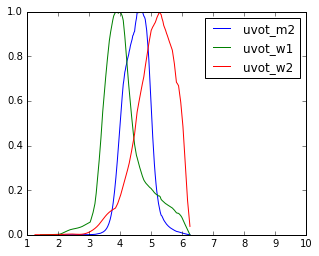

In [12]:
fig = plt.figure(figsize=(5,4))
for item in uv_filters[2:5]:
    filt = fsps.get_filter(item)
    plt.plot(10**4/filt.transmission[0], filt.transmission[1]/max(filt.transmission[1]), label=item)

plt.xlim(1,10)    
plt.legend()
plt.show()

The three UVOT filters nicely cover the region of interest.

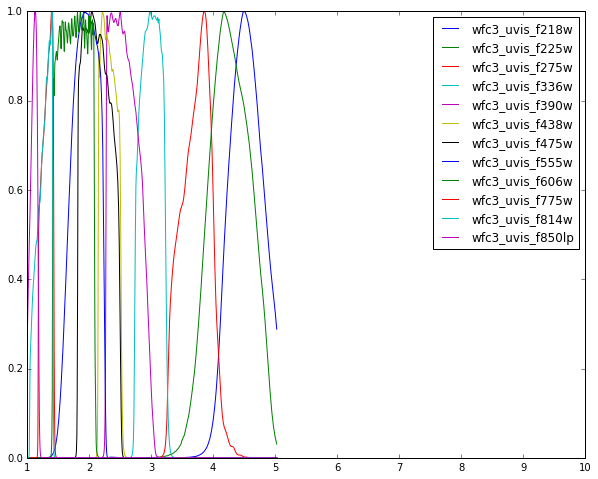

In [13]:
fig = plt.figure(figsize=(10,8))
for item in uv_filters[5:]:
    filt = fsps.get_filter(item)
    plt.plot(10**4/filt.transmission[0], filt.transmission[1]/max(filt.transmission[1]), label=item)

plt.xlim(1,10)    
plt.legend()
plt.show()

No combination of WFC3 filters covers the region of interest fully.

In conclusion, it seems that the UVOT filters are best suited to constrain the bump fraction.

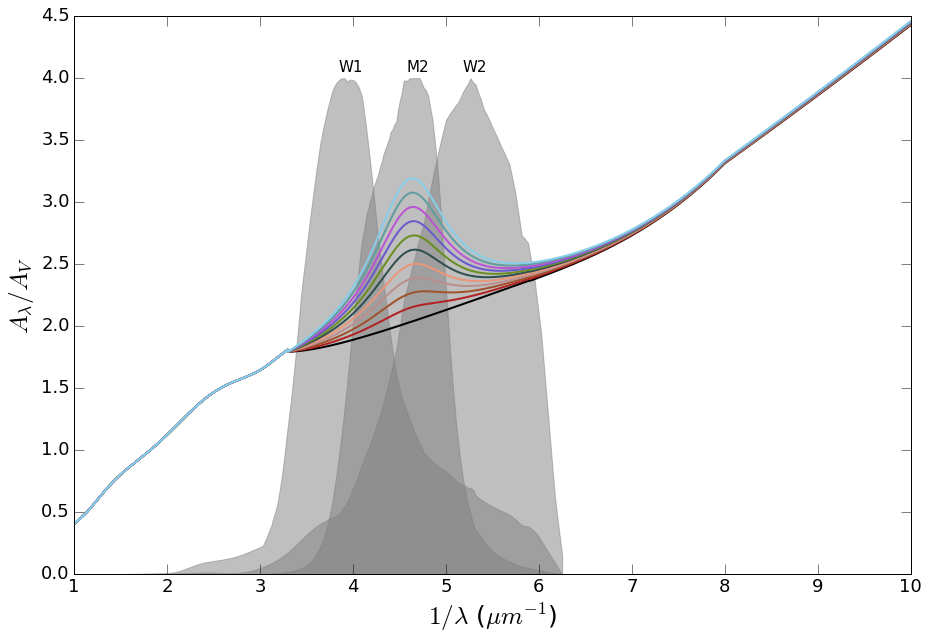

In [20]:
fig, ax = plt.subplots(figsize=(15,10),dpi=300)
fbumps = np.linspace(0,1,num=11)
colors = ['black','firebrick','sienna','rosybrown','darksalmon','darkslategray','olivedrab','slateblue',\
          'mediumorchid','cadetblue','skyblue']
m2 = fsps.get_filter('uvot_m2').transmission
w1 = fsps.get_filter('uvot_w1').transmission
w2 = fsps.get_filter('uvot_w2').transmission

for i in range(11):
    conroy = attenuation.conroy(lambdas, f_bump=fbumps[i])
    ax.plot(10**4/lambdas, conroy, label=r'$f_{\rm bump} = $'+str(fbumps[i]), lw=2, color=colors[i])
for u in [m2, w1, w2]:
    filt = fsps.get_filter(item).transmission
    ax.fill_between(10**4/u[0], 4*u[1]/np.max(u[1]), color='gray', alpha=0.5)
    
ax.text(10**4/m2[0][np.where(m2[1]==np.max(m2[1]))[0]][2]-0.1,4.05,'M2', fontsize=15)
ax.text(10**4/w1[0][np.where(w1[1]==np.max(w1[1]))[0]]-0.05,4.05,'W1', fontsize=15)
ax.text(10**4/w2[0][np.where(w2[1]==np.max(w2[1]))[0]]-0.08,4.05,'W2', fontsize=15)
ax.set_xlabel(r'$1/\lambda$ ($\mu m^{-1}$)', fontsize=25)
ax.set_ylabel(r'$A_{\lambda}/A_V$', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=18, size=10)
plt.show()